In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit

In [2]:
# define functions
def LinearFunc(t, a, b):
    return a * t + b

def ChiSqrd(Data, Fit, Error):
    return sum( ((Data - Fit) / Error)**2 )

def RdChiSqrd(Data, Fit, Error, NumPrams):
    return sum( ((Data - Fit) / Error)**2 ) / (np.size(Data) - NumPrams - 2)

def GuessFunc(x, a, b, A, h):
    return A*(1 - a*(x - b) / np.sqrt((a*(x - b))**2 + 1)) + h

def GuessFunc2(x, A, c, b, h):
    return A*np.tanh((x-b)/c) + h

def WeightedAverageError(Err):
    return np.sqrt( 1/( sum( 1/(Err)**2 ) ) )

def WeightedAverage(Val, Err):
    return ( sum( Val/(Err)**2 ) )/( sum( 1/(Err)**2 ) )

## BaTiO3
### Importing Data and Error Determination

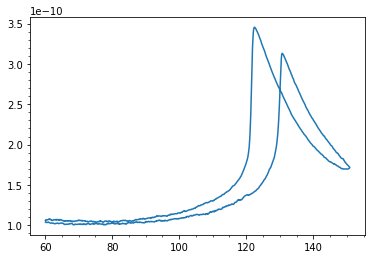

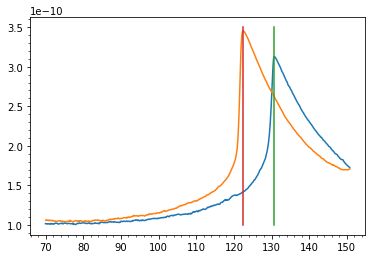

130.696
122.434


In [3]:
# Importing and formatting data
# Reading Files
Data = pd.read_csv("Data/BaTiO3_CSV.CSV")

#Seperating Data
x = pd.DataFrame(Data, columns= ['Col1'])
y = pd.DataFrame(Data, columns= ['Col4'])

#Formatting Data
x = np.resize(x,(1544,1))
y = np.resize(y,(1544,1))

TStartIndex = 74
TCutIndex = 766
TEndIndex = 1424

#print(np.where(x < 70))
#print(np.where(x == max(x)))

#Resizing and cutting
y = -(y/(25000*1000)) #internal resistnace from manual is 1kOhm frequency is 25kHz

xF = x[0:1512,0]
yF = y[0:1512,0]

x1 = x[TStartIndex:TCutIndex,0]
y1 = y[TStartIndex:TCutIndex,0]

x2 = x[(TCutIndex+1):TEndIndex,0]
y2 = y[(TCutIndex+1):TEndIndex,0]

#print(np.where(y1 == max(y1)))
#print(np.where(y2 == max(y2)))

plt.plot(xF, yF)
plt.minorticks_on()
plt.show()

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot([x1[528], x1[528]],[10**(-10),3.5*10**(-10)])
plt.plot([x2[211], x2[211]],[10**(-10),3.5*10**(-10)])
plt.minorticks_on()
plt.show()

print(x1[528])
print(x2[211])